In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
   
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn
import pandas as pd

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

from tigramite.models import LinearMediation, Prediction

In [2]:
#lettura csv building 1

electricity_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_1.csv")
print(electricity_data)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [3]:
#lettura csv carbon_intensity
carbon_intensity_data = pd.read_csv("citylearn_challenge_2023_phase_1/carbon_intensity.csv")
print(carbon_intensity_data)

     carbon_intensity
0            0.402488
1            0.382625
2            0.369458
3            0.367017
4            0.374040
..                ...
715          0.465811
716          0.470324
717          0.462414
718          0.448648
719          0.428057

[720 rows x 1 columns]


In [4]:
#aggiunta del campo carbon_intensity coi relativi valori nel dataset dell'elettricità

electricity_data['carbon_intensity'] = carbon_intensity_data['carbon_intensity']
print(electricity_data)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

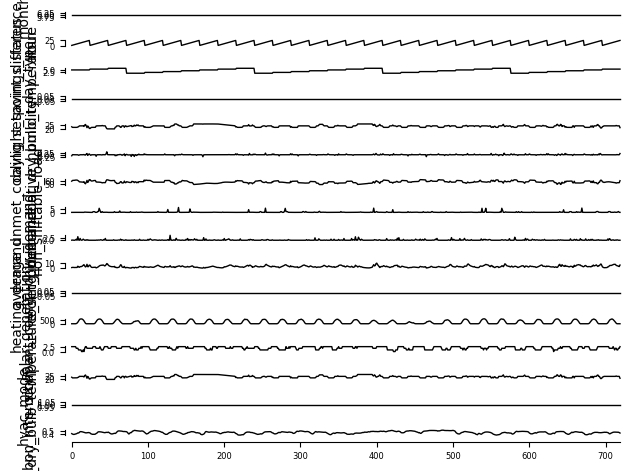

In [5]:
#rendo i dati in formato numpy e creo il dataframe tigramite e mostro il grafico delle time_series
data_array = electricity_data.values
dataframe = pp.DataFrame(data=data_array, var_names=list(electricity_data.columns))
tp.plot_timeseries(dataframe); plt.show()

In [6]:
#Specifica del test di indipendenza
parcorr = ParCorr()

#esecuzione PCMCI
pcmci_parcorr = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)

#definisco i lag da considerare
results = pcmci_parcorr.run_pcmci(tau_max=2, pc_alpha=0.05, alpha_level = 0.01)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable month has 0 link(s):

    Variable hour has 6 link(s):
        (hour -1): max_pval = 0.00000, |min_val| =  0.580
        (carbon_intensity -1): max_pval = 0.00034, |min_val| =  0.134
        (cooling_demand -2): max_pval = 0.00037, |min_val| =  0.133
        (solar_generation -2): max_pval = 0.00346, |min_val| =  0.110
        (carbon_intensity -2): max_pval = 0.01834, |min_val| =  0.088
        (dhw_demand -1): max_pval = 0.04141, |min_val| =  0.076

    Variable day_type has 1 link(s):
        (day_type -1): max_pval = 0.00000, |min_val| =  0.702

    Variable daylight_savings_status has 0 link(s):

    Variable indoor_dry_bulb_temperature has 4 link(s):
        (solar_generation -2): max_pval = 0.00000, |min_val| =  0.197
        (hour -2):

In [7]:
#Visualizzo i risultati
print("p-values:")
print(results['p_matrix'])
print("Valori causali:")
print(results['val_matrix'])

p-values:
[[[1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 1.00000000e+000 1.00000000e+000]]

 [[1.00000000e+000 1.00000000e+000 1.00000000e+000]
  [1.00000000e+000 4.15978920e-057 3.75067828e-001]
  [9.86045017e-001 8.31826680e-001 9.05275913e-001]


In [8]:
p_matrix = results['p_matrix']
val_matrix = results['val_matrix']

num_vars = len(dataframe.var_names)
for i in range(num_vars):
    for j in range(num_vars):
        for tau in range(p_matrix.shape[2]):
            if p_matrix[i, j, tau] < 0.01:
                print(f"Link significativo da {dataframe.var_names[i]} a {dataframe.var_names[j]} al lag {tau} "
                      f"con p-value {p_matrix[i, j, tau]:.4f} e MCI {val_matrix[i, j, tau]:.4f}")


Link significativo da hour a hour al lag 1 con p-value 0.0000 e MCI 0.5502
Link significativo da hour a average_unmet_cooling_setpoint_difference al lag 2 con p-value 0.0026 e MCI 0.1128
Link significativo da hour a indoor_relative_humidity al lag 1 con p-value 0.0054 e MCI -0.1044
Link significativo da day_type a day_type al lag 1 con p-value 0.0000 e MCI 0.7018
Link significativo da indoor_dry_bulb_temperature a hour al lag 1 con p-value 0.0078 e MCI 0.1000
Link significativo da indoor_dry_bulb_temperature a average_unmet_cooling_setpoint_difference al lag 0 con p-value 0.0000 e MCI -0.7811
Link significativo da indoor_dry_bulb_temperature a indoor_relative_humidity al lag 0 con p-value 0.0000 e MCI -0.9920
Link significativo da indoor_dry_bulb_temperature a indoor_relative_humidity al lag 1 con p-value 0.0015 e MCI 0.1194
Link significativo da indoor_dry_bulb_temperature a indoor_relative_humidity al lag 2 con p-value 0.0005 e MCI 0.1314
Link significativo da indoor_dry_bulb_tempera

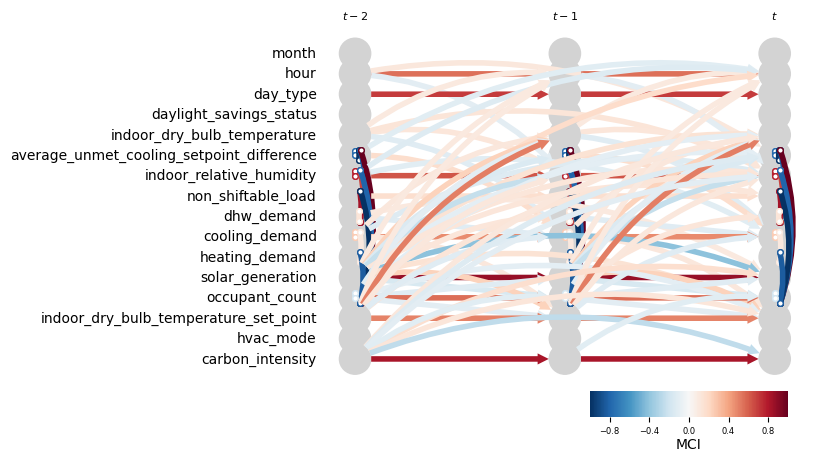

In [9]:
#mostro il plot del grafo delle time_series
tp.plot_time_series_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=list(electricity_data.columns),
    link_colorbar_label='MCI',
    ); plt.show()

Segue la parte di codice basata sulla predizione, andando ad usare la funzione Prediction come nel tutorial.

In [10]:
T = data_array.shape[0]

pred = Prediction(dataframe=dataframe,
        cond_ind_test=ParCorr(),   #CMIknn ParCorr
        prediction_model = sklearn.linear_model.LinearRegression(),
#         prediction_model = sklearn.gaussian_process.GaussianProcessRegressor(),
        # prediction_model = sklearn.neighbors.KNeighborsRegressor(),
    data_transform=sklearn.preprocessing.StandardScaler(),
    train_indices= range(int(0.75*T)),
    test_indices= range(int(0.25*T), T),
    verbosity=1
    )


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 5
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable month has 0 link(s):

    Variable hour has 7 link(s):
        (hour -1): max_pval = 0.00000, |min_val| =  0.501
        (solar_generation -5): max_pval = 0.00000, |min_val| =  0.345
        (solar_generation -4): max_pval = 0.00001, |min_val| =  0.191
        (hour -4): max_pval = 0.00032, |min_val| =  0.156
        (carbon_intensity -1): max_pval = 0.00163, |min_val| =  0.137
        (solar_generation -3): max_pval = 0.01815, |min_val| =  0.103
        (cooling_demand -1): max_pval = 0.02563, |min_val| =  0.097

    Variable day_type has 1 link(s):
        (day_type -1): max_pval = 0.00000, |min_val| =  0.702

    Variable daylight_savings_status has 0 link(s):

    Variable indoor_dry_bulb_temperature has 6 link(s):
        (solar_generatio

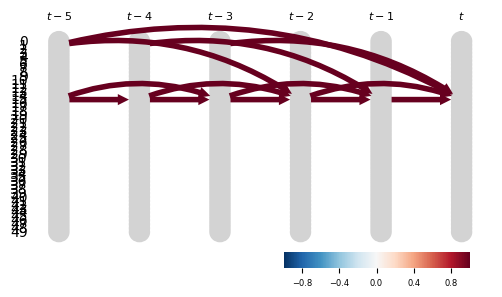

In [14]:
target = 15
tau_max = 5
predictors = pred.get_predictors(
                  selected_targets=[target],
                  steps_ahead=1,
                  tau_max=tau_max,
                  pc_alpha=0.05
                  )

graph = np.zeros((50, 50, tau_max+1), dtype='bool')
for j in [target]:
    for p in predictors[j]:
        graph[p[0], j, abs(p[1])] = 1

# Plot time series graph
tp.plot_time_series_graph(
    figsize=(6, 3),
#     node_aspect=2.,
    val_matrix=np.ones(graph.shape),
    graph=graph,
    var_names=None,
    link_colorbar_label='',
    ); plt.show()

In [15]:
pred.fit(target_predictors=predictors, 
                selected_targets=[target],
                    tau_max=tau_max)

c:\Users\Simone\Desktop\Tesi\tigramite\models.py:1894: UserWarning: test_indices - maxlag(predictors) [or tau_max] overlaps with train_indices: Choose test_indices such that there is a gap of max_lag to train_indices!
  warnings.warn("test_indices - maxlag(predictors) [or tau_max] "



##
## Predicting target 15
##


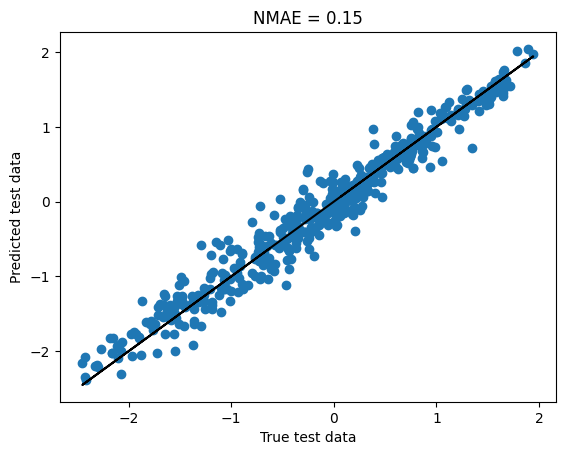

In [16]:
predicted = pred.predict(target)
true_data = pred.get_test_array(j=target)[0]

plt.scatter(true_data, predicted)
plt.title(r"NMAE = %.2f" % (np.abs(true_data - predicted).mean()/true_data.std()))
plt.plot(true_data, true_data, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 2
tau_max = 20
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




c:\Users\Simone\Desktop\Tesi\tigramite\independence_tests\parcorr.py:103: UserWarning: Possibly constant array!
  warnings.warn("Possibly constant array!")
c:\Users\Simone\Desktop\Tesi\tigramite\independence_tests\parcorr.py:318: RuntimeWarning: divide by zero encountered in log
  score = T * np.log(rss) + 2. * p



## Resulting lagged parent (super)sets:

    Variable month has 0 link(s):
    [pc_alpha = 0.05]

    Variable hour has 30 link(s):
    [pc_alpha = 0.5]
        (solar_generation -16): max_pval = 0.00000, |min_val| =  0.455
        (solar_generation -7): max_pval = 0.00001, |min_val| =  0.207
        (solar_generation -4): max_pval = 0.00532, |min_val| =  0.125
        (average_unmet_cooling_setpoint_difference -10): max_pval = 0.00598, |min_val| =  0.123
        (occupant_count -18): max_pval = 0.00796, |min_val| =  0.119
        (hour -2): max_pval = 0.01280, |min_val| =  0.114
        (occupant_count -6): max_pval = 0.06593, |min_val| =  0.085
        (solar_generation -20): max_pval = 0.07070, |min_val| =  0.082
        (average_unmet_cooling_setpoint_difference -15): max_pval = 0.11053, |min_val| =  0.072
        (average_unmet_cooling_setpoint_difference -16): max_pval = 0.14675, |min_val| =  0.066
        (hour -16): max_pval = 0.15406, |min_val| =  0.066
        (hour -20): ma

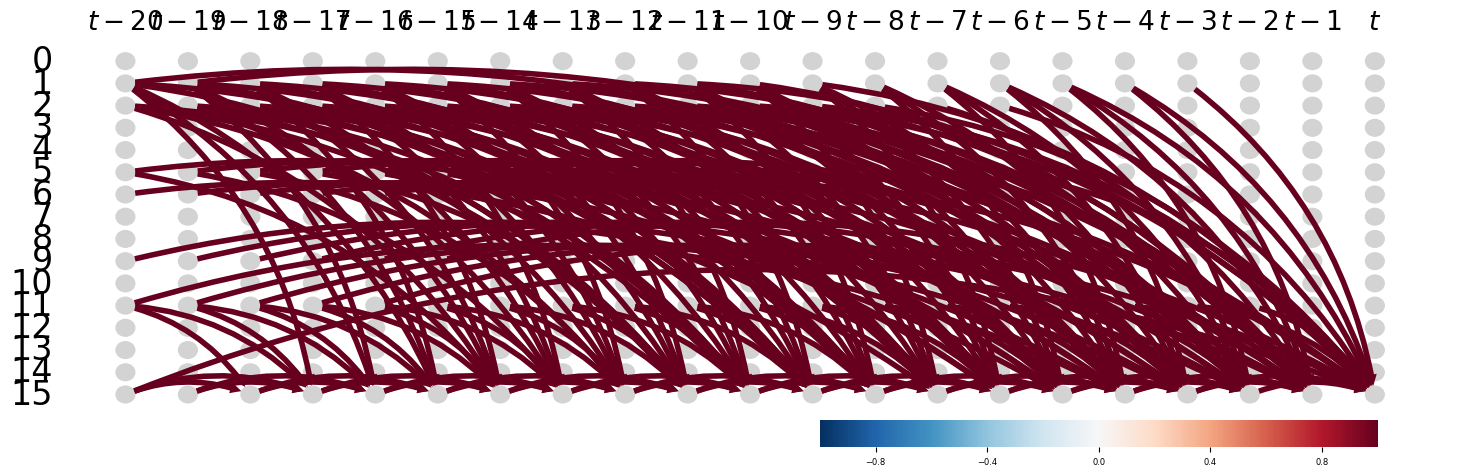

In [18]:
tau_max = 20
steps_ahead = 2
target = 15
N = len(electricity_data.columns)

all_predictors = pred.get_predictors(
                  selected_targets=[target],
                  steps_ahead=steps_ahead,
                  tau_max=tau_max,
                  pc_alpha=None
                  )
graph = np.zeros((N, N, tau_max + 1), dtype='bool')
for j in [target]:
    for p in all_predictors[j]:
        graph[p[0], j, abs(p[1])] = 1

# Plot time series graph
tp.plot_time_series_graph(
    figsize=(18, 5),
    node_size=0.05,
    node_aspect=.3,
    val_matrix=np.ones(graph.shape),
    graph=graph,
    var_names=None,
    link_colorbar_label='',
    label_fontsize=24
    ); plt.show()

In [19]:
pred.fit(target_predictors=all_predictors, 
                selected_targets=[target],
                    tau_max=tau_max)

c:\Users\Simone\Desktop\Tesi\tigramite\models.py:1894: UserWarning: test_indices - maxlag(predictors) [or tau_max] overlaps with train_indices: Choose test_indices such that there is a gap of max_lag to train_indices!
  warnings.warn("test_indices - maxlag(predictors) [or tau_max] "



##
## Predicting target 15
##


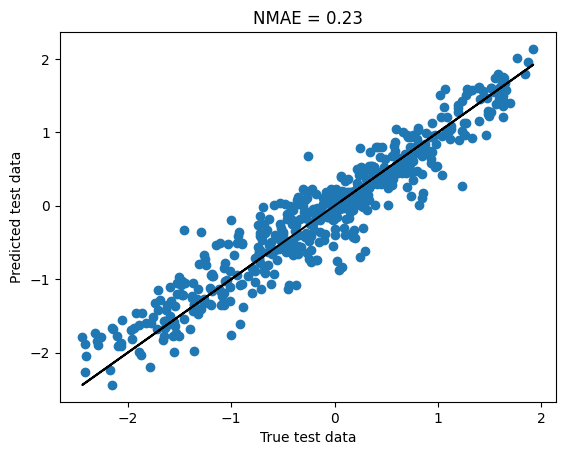

In [20]:
predicted = pred.predict(target)
true_data = pred.get_test_array(j=target)[0]

plt.scatter(true_data, predicted)
plt.title(r"NMAE = %.2f" % (np.abs(true_data - predicted).mean()/true_data.std()))
plt.plot(true_data, true_data, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()

Qua di seguito vi è la parte di ANN che riprende l'esempio fatto durante il corso di intelligenza artificiale

In [39]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

In [40]:
target = 'indoor_relative_humidity'
features = ['hour', 'indoor_dry_bulb_temperature',	'average_unmet_cooling_setpoint_difference', 'cooling_demand',	'solar_generation',	'indoor_dry_bulb_temperature_set_point',	'carbon_intensity']
df = electricity_data

In [41]:
def create_model_large():
    # create model
    model = Sequential()
    #your code here	
    model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(Dense(30, activation = 'relu'))
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = [metrics.mae])
    
    return model

In [42]:
def RMSE(real, pred):
    return sqrt(mean_squared_error(real, pred))

def NRMSE(real, pred):
    return sqrt(mean_squared_error(real, pred)/(real.max() - real.min()))

In [43]:
# Descriptive statistics summary
df = df.drop(columns=['month',	'day_type', 'daylight_savings_status', 'non_shiftable_load', 'dhw_demand',	'heating_demand',	'occupant_count',	'hvac_mode'])
df.describe()

,hour,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,cooling_demand,solar_generation,indoor_dry_bulb_temperature_set_point,carbon_intensity
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,12.500000,24.024244,0.003642,57.808783,3.333438,200.066115,24.020602,0.454334
std,6.926999,1.538245,0.042871,4.707318,1.827450,243.372592,1.548475,0.048759
min,1.000000,19.999914,-0.238674,46.463528,0.000000,0.000000,20.000000,0.337515
25%,6.750000,22.332079,-0.000159,54.488178,2.076277,0.000000,22.319445,0.422080
50%,12.500000,24.444309,0.000007,57.407695,3.043866,35.825709,24.444445,0.459258
75%,18.250000,24.444458,0.000476,61.325861,4.262129,422.030280,24.444445,0.489864
max,24.000000,27.222233,0.353503,67.854750,10.608549,703.628300,27.222221,0.556063


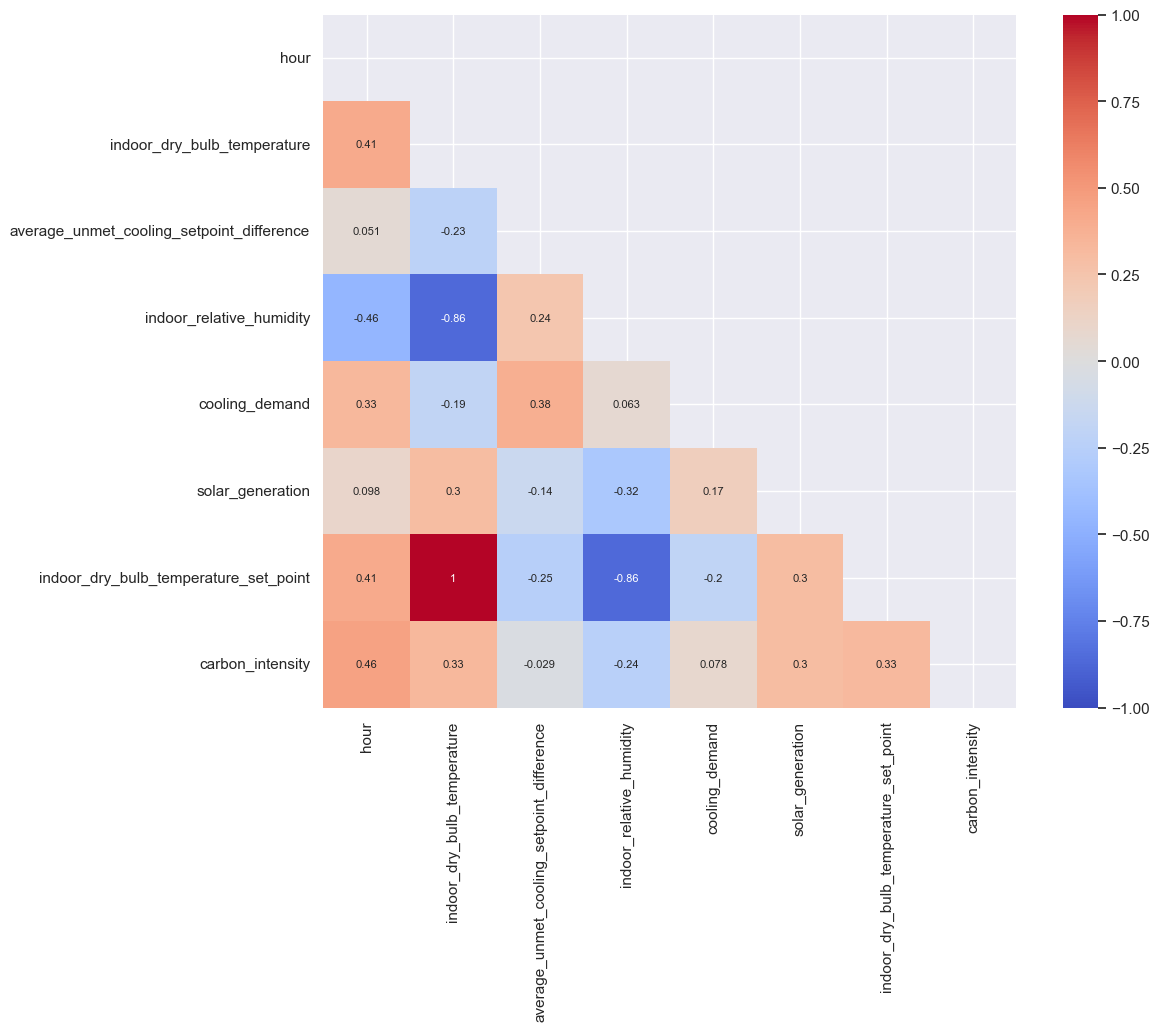

In [44]:
# Correlation matrix
corrmat = df.corr()

# Generate a mask for the upper triangle
matrix = np.triu(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1)
sns.heatmap(corrmat, vmin=-1, vmax=1, center= 0, square=True, annot=True, annot_kws={'size': 8}, mask=matrix, fmt='.2g', cmap= 'coolwarm')

plt.show()

In [45]:
# Standardizing data
sc= MinMaxScaler(feature_range=(-1,1))

for var in features:
    if(var != 'indoor_relative_humidity'):
        df[var] = sc.fit_transform(df[var].values.reshape(-1, 1))

In [46]:
#NumPy representation of the data frame (removing labels)
df = pd.DataFrame(data=df)

X = df.drop(columns='indoor_relative_humidity')
X = X.to_numpy()

Y = df['indoor_relative_humidity']
Y = Y.to_numpy()


seed = 7
np.random.seed(seed)

# split dataset in 75% for traininig and 25% for testing (500 -> 375,125)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

# split training in 80% for traininig and 20% for validating (375 -> 300,75)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=seed)#insert your code here

# Model creation (choose between tiny, small, medium and large by using the appropriate function)
model = create_model_large()
model.summary()



c:\Users\Simone\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 40)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,691 (6.61 KB)

 Trainable params: 1,691 (6.61 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, batch_size=32)

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3357.6208 - mean_absolute_error: 57.7379 - val_loss: 3315.1484 - val_mean_absolute_error: 57.3999
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3270.3860 - mean_absolute_error: 56.9798 - val_loss: 3261.5312 - val_mean_absolute_error: 56.9233
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3214.4783 - mean_absolute_error: 56.4662 - val_loss: 3178.2583 - val_mean_absolute_error: 56.1744
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3171.2571 - mean_absolute_error: 56.0515 - val_loss: 3042.1597 - val_mean_absolute_error: 54.9251
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3013.9558 - mean_absolute_error: 54.6080 - val_loss: 2816.7468 - val_mean_absolute_error: 52.7832
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2725.3992 - mean_absolute_error: 51.8148 - val_loss: 2457.2578 - val_mean_absolute_error: 49.1491
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss

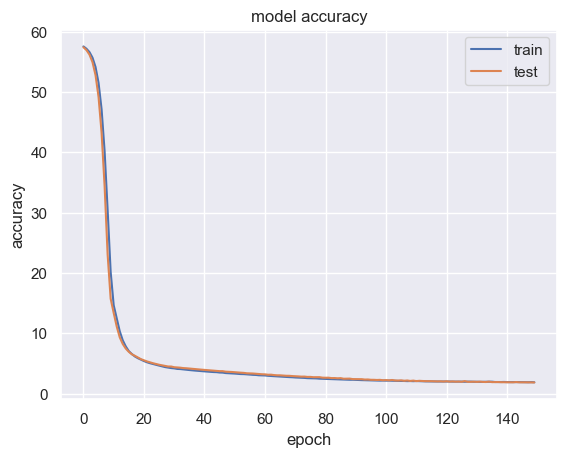

In [48]:
# Summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


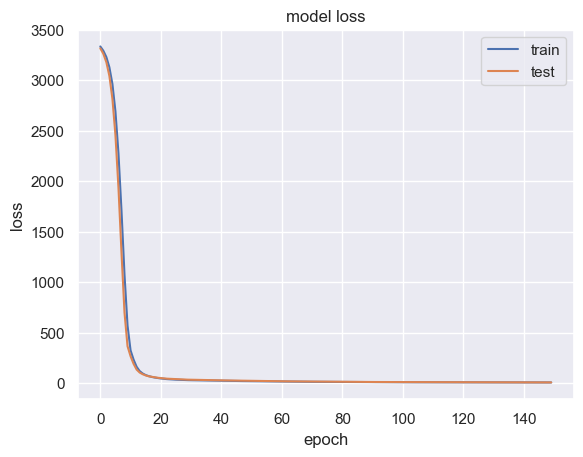

In [49]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [50]:
# Prediction
pred = model.predict(X_test).reshape(1,-1)[0]

rmse = RMSE(y_test, pred)
nrmse = NRMSE(y_test, pred)


print("rmse : ",rmse,"  nrmse : ",nrmse)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
rmse :  2.503207546074598   nrmse :  0.5507543240745056


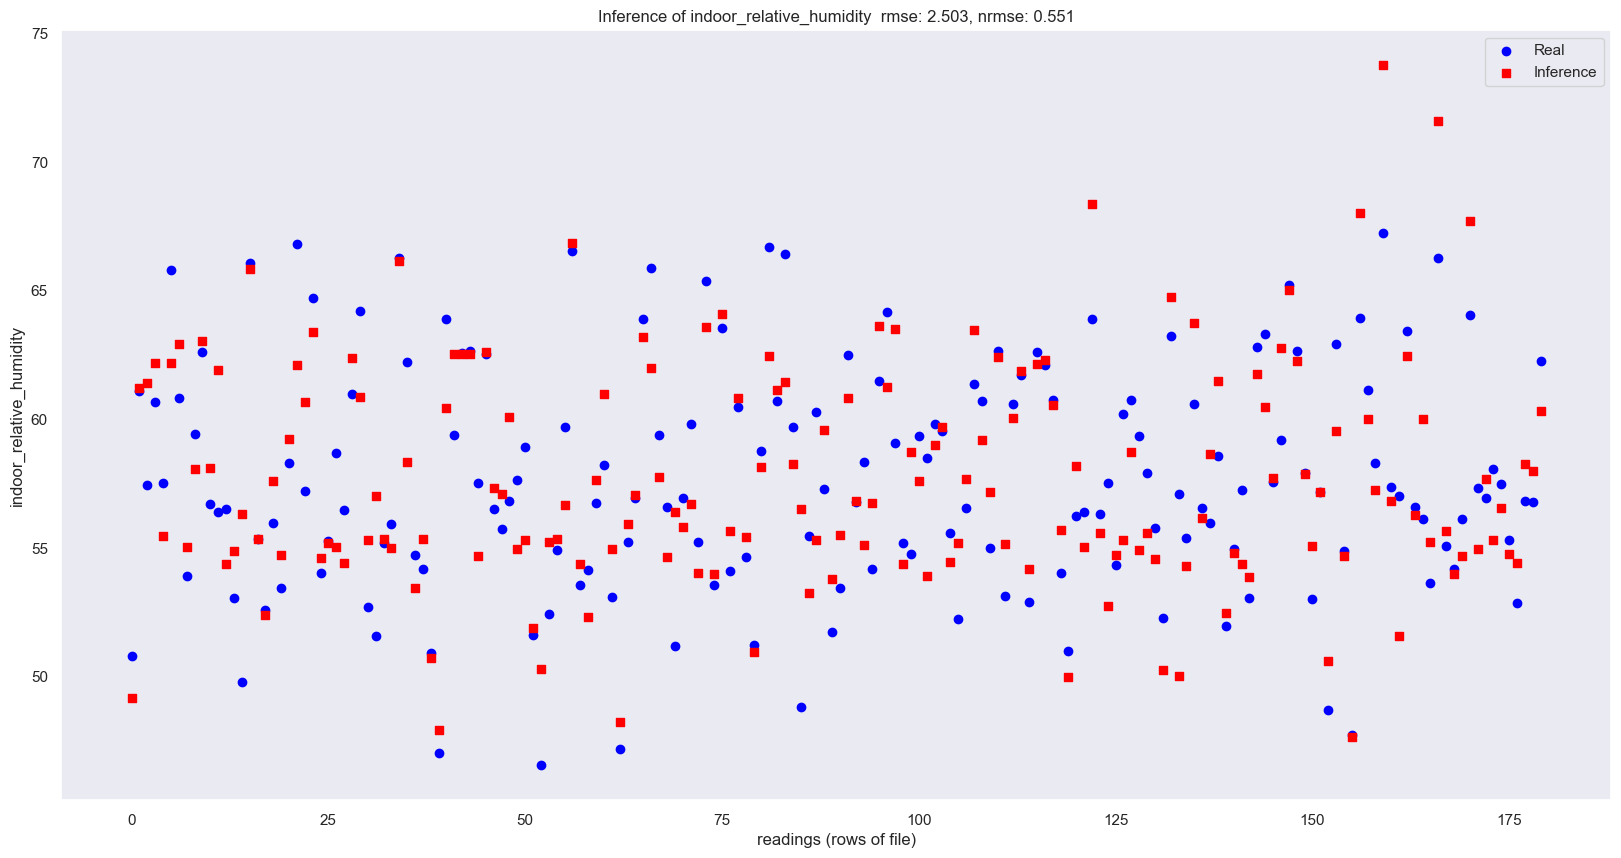

In [51]:
my_x=np.arange(0,len(X_test[:,0]),1)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, y_test, label='Real', color='blue', marker='o')
plt.scatter(my_x, pred, label='Inference', color='red', marker='s')
plt.title(f'Inference of indoor_relative_humidity  rmse: {rmse:.3f}, nrmse: {nrmse:.3f}')
plt.ylabel('indoor_relative_humidity')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

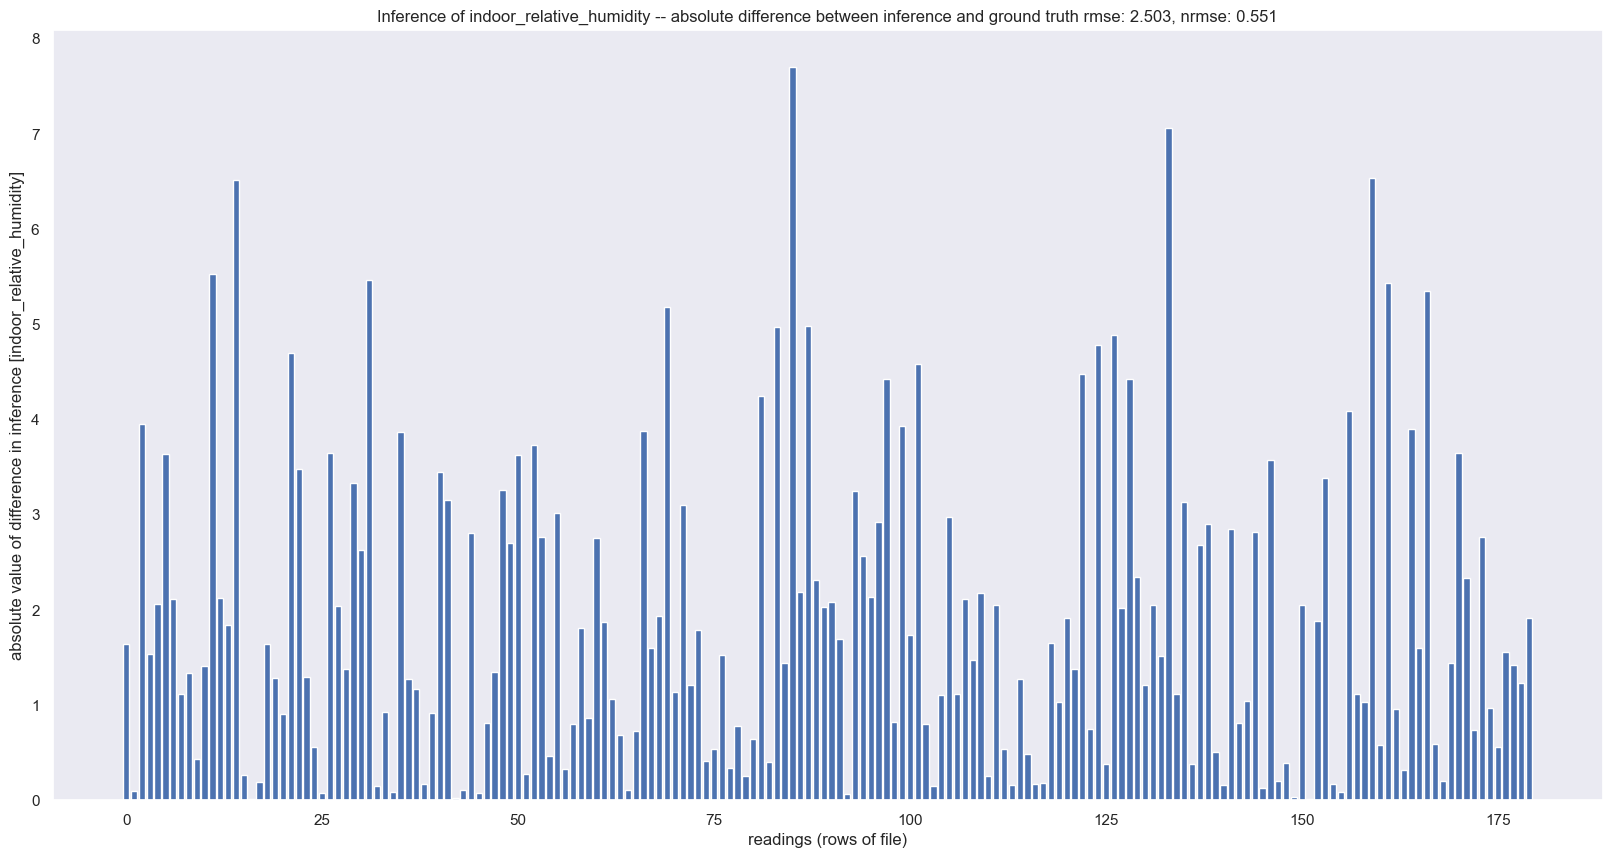

In [52]:
fig = plt.figure(figsize=(20,10))
my_d = abs(y_test-pred)

plt.bar(my_x,my_d)
plt.title(f'Inference of indoor_relative_humidity -- absolute difference between inference and ground truth rmse: {rmse:.3f}, nrmse: {nrmse:.3f}')
plt.ylabel('absolute value of difference in inference [indoor_relative_humidity]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()